Đọc dữ liệu từ: D:/Year 4/tiến hóa/project/UWSN_greedy/output_path/output_greedy
  → greedy: 1 file kết quả hợp lệ.
Đọc dữ liệu từ: D:/Year 4/tiến hóa/project/UWSN_greedy/output_path/output_PSO
  → PSO: 5 file kết quả hợp lệ.


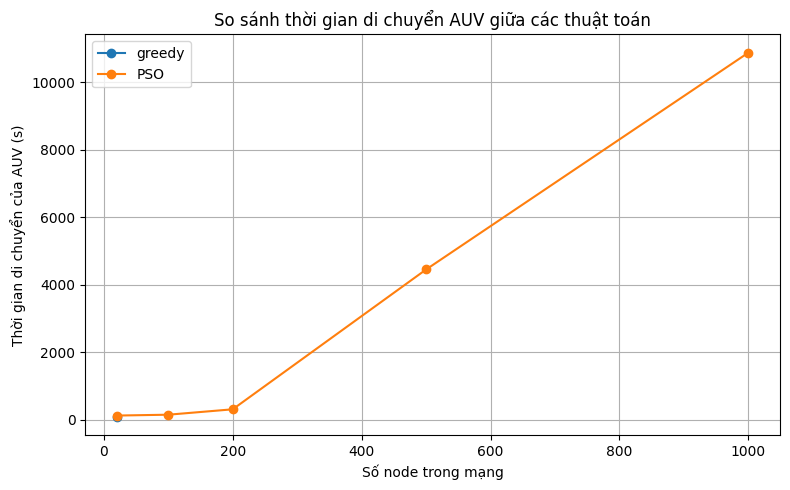

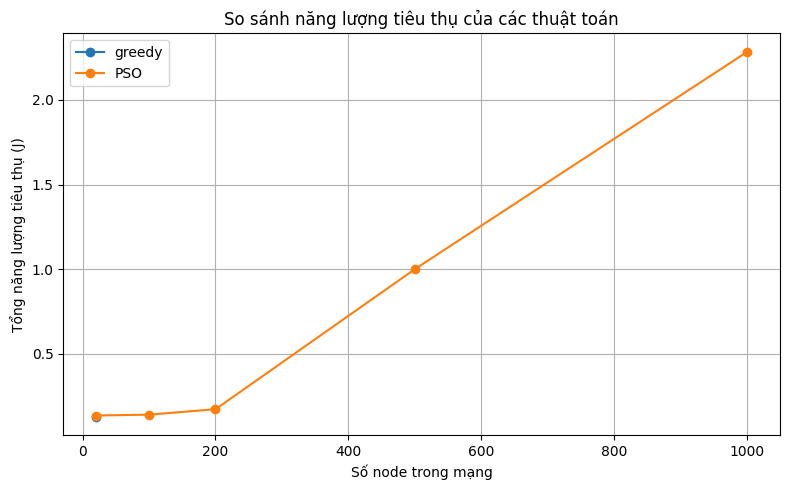

In [ ]:
import os
import json
import re
import matplotlib.pyplot as plt

# =============================
# HÀM ĐỌC KẾT QUẢ TỪ THƯ MỤC
# =============================
def load_results_from_folder(folder_path, algo_name):
    results = []
    for file in os.listdir(folder_path):
        if file.endswith("_result.json"):
            match = re.search(r"(\d+)", file)  # lấy số node từ tên file
            if not match:
                continue
            num_nodes = int(match.group(1))
            with open(os.path.join(folder_path, file), "r") as f:
                data = json.load(f)

            # --- Đọc dữ liệu từ file JSON ---
            best_time = data.get("best_time", None)
            E_member = data["energy"]["Member"]["E_total"]
            E_target = data["energy"]["Target"]["E_total"]
            total_energy = E_member + E_target

            results.append((num_nodes, best_time, total_energy))

    # sắp xếp theo số node tăng dần
    results.sort(key=lambda x: x[0])

    return {
        "algo": algo_name,
        "nodes": [r[0] for r in results],
        "times": [r[1] for r in results],
        "energies": [r[2] for r in results],
    }


# =============================
# CÁC HÀM VẼ BIỂU ĐỒ
# =============================
def plot_travel_time(all_results, save_dir=None):
    plt.figure(figsize=(8, 5))
    for res in all_results:
        x = res["nodes"]
        y = res["times"]
        plt.plot(x, y, marker="o", label=res["algo"])
        # annotate each point with its y-value
        for xi, yi in zip(x, y):
            if yi is None:
                continue
            plt.annotate(f"{yi:.2f}", xy=(xi, yi), xytext=(0, 6),
                         textcoords="offset points", ha="center", va="bottom",
                         fontsize=8)
    plt.xlabel("Số node trong mạng")
    plt.ylabel("Thời gian di chuyển của AUV (s)")
    plt.title("So sánh thời gian di chuyển AUV giữa các thuật toán")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    if save_dir:
        plt.savefig(os.path.join(save_dir, "compare_travel_time.png"))
    plt.show()


def plot_total_energy(all_results, save_dir=None):
    plt.figure(figsize=(8, 5))
    for res in all_results:
        x = res["nodes"]
        y = res["energies"]
        plt.plot(x, y, marker="o", label=res["algo"])
        # annotate each point with its y-value
        for xi, yi in zip(x, y):
            if yi is None:
                continue
            plt.annotate(f"{yi:.2f}", xy=(xi, yi), xytext=(0, 6),
                         textcoords="offset points", ha="center", va="bottom",
                         fontsize=8)
    plt.xlabel("Số node trong mạng")
    plt.ylabel("Tổng năng lượng tiêu thụ (J)")
    plt.title("So sánh năng lượng tiêu thụ của các thuật toán")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    if save_dir:
        plt.savefig(os.path.join(save_dir, "compare_total_energy.png"))
    plt.show()

if __name__ == "__main__":
    base_dir = "D:/Year 4/tiến hóa/project/UWSN_greedy/output_path/"
    output_folders = [f for f in os.listdir(base_dir)
                      if os.path.isdir(os.path.join(base_dir, f)) and f.startswith("output_")]

    all_results = []
    for folder in output_folders:
        algo_name = folder.replace("output_", "")
        folder_path = os.path.join(base_dir, folder)
        print(f"Đọc dữ liệu từ: {folder_path}")
        res = load_results_from_folder(folder_path, algo_name)
        if len(res["nodes"]) > 0:
            all_results.append(res)
            print(f"  → {algo_name}: {len(res['nodes'])} file kết quả hợp lệ.")
        else:
            print(f"Không tìm thấy file hợp lệ trong {folder_path}")

    if all_results:
        plot_travel_time(all_results, save_dir=base_dir)
        plot_total_energy(all_results, save_dir=base_dir)
        
    else:
        print("Không có dữ liệu")
